# Multi-class classification
reference: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
image, label = training_data[0]
label
image.shape

torch.Size([1, 28, 28])

In [4]:
# Check how many train and test dataset
len(training_data.data), len(training_data.targets), len(test_data.data)

(60000, 60000, 10000)

In [5]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

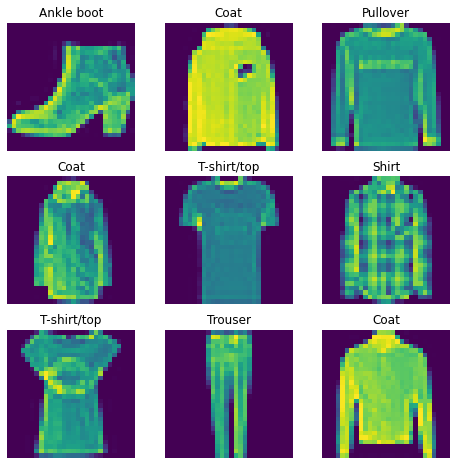

In [6]:
fig = plt.figure(figsize=(8, 8))
rows, columns = 3, 3
for i in range(1,10):
    idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.squeeze())
    plt.title(training_data.classes[label])
    plt.axis(False)

## Create DataLoader

In [7]:
from torch.utils.data import DataLoader
# batch_size hyperparameter
batch_size = 32
train_dataloader = DataLoader(training_data, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=batch_size,
                             shuffle=False)

## Build baseline model

In [8]:
# Build baseline model
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)
            

In [9]:
torch.manual_seed(42)
model_0 = FashionMNISTModel(input_shape=784, hidden_units=10, 
                            output_shape=len(training_data.classes))
model_0.to("cpu")

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

In [10]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

## Training loop

In [11]:
from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}/{epochs}")
    # Train
    train_loss = 0
    for batch_idx, (data, y_target) in enumerate(train_dataloader):
        model_0.train()
        # forward pass
        y_pred = model_0(data)
        loss = loss_fn(y_pred, y_target)
        train_loss += loss
        # backward pass
        loss.backward()
        # update parameters
        optimizer.zero_grad()
        optimizer.step()
        if batch_idx % 500 == 0:
            print(f"Batch: {batch_idx}")
    train_loss /= len(train_dataloader)
    print(f"Train loss: {train_loss}")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 10%|█         | 1/10 [00:05<00:47,  5.29s/it]

Train loss: 2.3184661865234375
Epoch: 2/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 20%|██        | 2/10 [00:10<00:42,  5.31s/it]

Train loss: 2.3184664249420166
Epoch: 3/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 30%|███       | 3/10 [00:15<00:35,  5.10s/it]

Train loss: 2.3184659481048584
Epoch: 4/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 40%|████      | 4/10 [00:20<00:30,  5.16s/it]

Train loss: 2.318462610244751
Epoch: 5/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 50%|█████     | 5/10 [00:25<00:25,  5.05s/it]

Train loss: 2.318467140197754
Epoch: 6/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 60%|██████    | 6/10 [00:30<00:20,  5.07s/it]

Train loss: 2.3184654712677
Epoch: 7/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 70%|███████   | 7/10 [00:35<00:15,  5.02s/it]

Train loss: 2.318464517593384
Epoch: 8/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 80%|████████  | 8/10 [00:40<00:10,  5.06s/it]

Train loss: 2.3184690475463867
Epoch: 9/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


 90%|█████████ | 9/10 [00:45<00:05,  5.05s/it]

Train loss: 2.318464756011963
Epoch: 10/10
Batch: 0
Batch: 500
Batch: 1000
Batch: 1500


100%|██████████| 10/10 [00:50<00:00,  5.08s/it]

Train loss: 2.318464994430542


## Testing

In [12]:
test_loss, test_acc = 0, 0
model_0.eval()
with torch.inference_mode():
    for data, y_target in test_dataloader:
        y_pred = model_0(data)
        loss = loss_fn(y_pred, y_target)
        test_loss += loss
        test_acc += accuracy_fn(y_pred.argmax(dim=1), y_target)
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

In [13]:
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

Test loss: 2.3190648555755615, Test accuracy: 10.852635782747603
